In [18]:
from iminuit import Minuit
from iminuit.cost import LeastSquares
from scipy.stats import norm, chi2
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

def BGO_part(t, tau, QR):            #funzione di fit per bgo e forse viene con csi, fit solo della discesa
    return QR/tau*(np.exp((-t)/tau)) 

ro1=0.90
ro2=0.10

def BGO_wheight_part(t, tau1, tau2, QR):                                        #funzione di fit per csi come dicono in sipm2324, fit solo della discesa
    return QR/(ro1*tau1+ro2*tau2)*(ro1*np.exp((-t)/tau1)+ro2*np.exp((-t)/tau2))


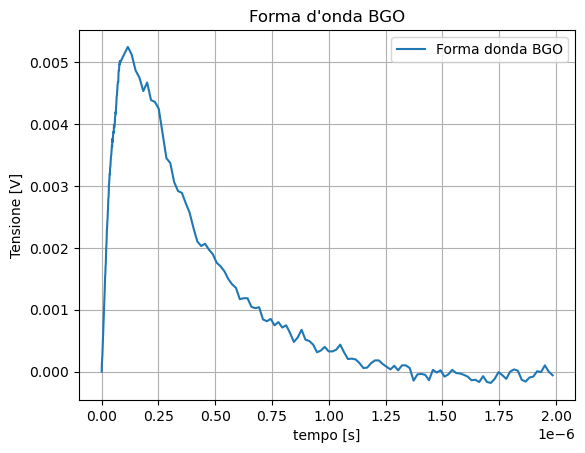

In [19]:
#FORMA D'ONDA BGO

data = pd.read_csv('Forma-BGO.CSV', delimiter=',')
data1= pd.read_csv('BGO-Salita.CSV', delimiter=',')
data2= pd.read_csv('BGO-Discesa.CSV', delimiter=',')

#combina data1 e data2 in un unico dataframe

smooth1=1
smooth2=17

times=np.array(data1['Time']+9.7e-08)[::smooth1]
timed=np.array(data2['Time']+9.7e-08)[::smooth2]
volts = np.array(data1['AverageVoltage']-0.0006618181818181819)[::smooth1]
voltd = np.array(data2['AverageVoltage']-0.0006618181818181819)[::smooth2]
time = np.concatenate((times,timed))    
volt = np.concatenate((volts,voltd))



#err sist sensibilità oscilloscopio
err_volt_s = np.array(data1['error'])[::smooth1]
err_volt_d = np.array(data2['error'])[::smooth2]
err_volt = np.sqrt((np.concatenate((err_volt_s,err_volt_d))/np.sqrt(6))**2+(0.00012)**2)

plt.plot(time, volt, label='Forma donda BGO')
plt.xlabel('tempo [s]')
plt.ylabel('Tensione [V]')
plt.title('Forma d\'onda BGO') 
plt.legend()
plt.grid()
plt.show()


In [20]:
def repeat_fit(ls, left_bound, right_bound, tau, QR, larghezza_minima, dis=False, limit_Time=0.5e-6):
    '''
    ampiezza picco limite = è la ampiezza dell'intorno di tau in cui è accettabile avere il picco
    '''
    tau_list = []
    error_tau_list = []
    QR_list = []
    error_QR_list = []
    for delta_Time in np.arange(0, abs(right_bound-left_bound)/2+limit_Time, 0.01e-6):
        ls.mask = (time > left_bound+delta_Time) & (time < right_bound-delta_Time)
        m = Minuit(ls, tau=tau, QR=QR)
        m.migrad()
        m.hesse()
        p_value = (1. - chi2.cdf (m.fval, df = m.ndof))
        if p_value > 0.05 and m.valid == True:
            if m.values['tau'] < (tau+larghezza_minima/2) and m.values['tau'] > (tau-larghezza_minima/2):    
                tau_list.append(m.values['tau'])
                error_tau_list.append(m.errors['tau'])
                QR_list.append(m.values['QR'])
                error_QR_list.append(m.errors['QR'])
                if dis==True: display(m)
        ls.mask = None
    for delta_Time in np.arange(0, abs(right_bound-left_bound)/2+limit_Time, 0.02e-6):
        ls.mask = (time > left_bound+delta_Time) & (time < right_bound-delta_Time/2)
        m = Minuit(ls, tau=tau, QR=QR)
        m.migrad()
        m.hesse()
        p_value = (1. - chi2.cdf (m.fval, df = m.ndof))
        if p_value > 0.05 and m.valid == True:
            if m.values['tau'] < (tau+larghezza_minima/2) and m.values['tau'] > (tau-larghezza_minima/2):    
                tau_list.append(m.values['tau'])
                error_tau_list.append(m.errors['tau'])
                QR_list.append(m.values['QR'])
                error_QR_list.append(m.errors['QR'])
                if dis==True: display(m)
        ls.mask = None
    for delta_Time in np.arange(0, abs(right_bound-left_bound)/2+limit_Time, 0.01e-6):
        ls.mask = (time > left_bound+delta_Time/2) & (time < right_bound-delta_Time)
        m = Minuit(ls, tau=tau, QR=QR)
        m.migrad()
        m.hesse()
        p_value = (1. - chi2.cdf (m.fval, df = m.ndof))
        if p_value > 0.05 and m.valid == True:
            if m.values['tau'] < (tau+larghezza_minima/2) and m.values['tau'] > (tau-larghezza_minima/2):    
                tau_list.append(m.values['tau'])
                error_tau_list.append(m.errors['tau'])
                QR_list.append(m.values['QR'])
                error_QR_list.append(m.errors['QR'])
                if dis==True: display(m)
        ls.mask = None
    return np.array(tau_list), np.array(error_tau_list), np.array(QR_list), np.array(error_QR_list)

C:\Users\aless\AppData\Local\Temp\ipykernel_21936\3985076025.py:9: RuntimeWarning: overflow encountered in exp
  return QR/tau*(np.exp((-t)/tau))
C:\Users\aless\AppData\Local\Temp\ipykernel_21936\3985076025.py:9: RuntimeWarning: overflow encountered in multiply
  return QR/tau*(np.exp((-t)/tau))


[2.94777322e-07 2.92733290e-07 2.92733290e-07 2.86017205e-07
 2.81994607e-07 2.81994607e-07 2.80960552e-07 2.80960552e-07
 2.79648286e-07 2.78968903e-07 2.78968903e-07 2.54838238e-07
 2.54838238e-07 2.57572104e-07 2.51617954e-07 2.51617954e-07
 2.94777322e-07 2.92733290e-07 2.81068124e-07 2.79540725e-07
 2.76054244e-07 2.94777322e-07 2.92733290e-07 2.92733290e-07
 2.92928211e-07 2.93524040e-07 2.86617716e-07 2.87328826e-07
 2.87328826e-07 2.83771934e-07 2.84407313e-07 2.84407313e-07
 2.83089705e-07 2.83089705e-07 2.83268500e-07 2.83626573e-07
 2.81431195e-07 2.81450573e-07 2.81450573e-07 2.80751328e-07
 2.80751328e-07 2.82012992e-07 2.82254814e-07]
[1.43397760e-08 1.49221790e-08 1.49221790e-08 1.55271394e-08
 1.60222536e-08 1.60222536e-08 1.65802527e-08 1.65802527e-08
 1.74801149e-08 1.84092391e-08 1.84092391e-08 3.16325951e-08
 3.16325951e-08 3.42280782e-08 3.57088611e-08 3.57088611e-08
 1.43397760e-08 1.49221790e-08 1.58776627e-08 1.63657418e-08
 1.79489423e-08 1.43397760e-08 1.49221

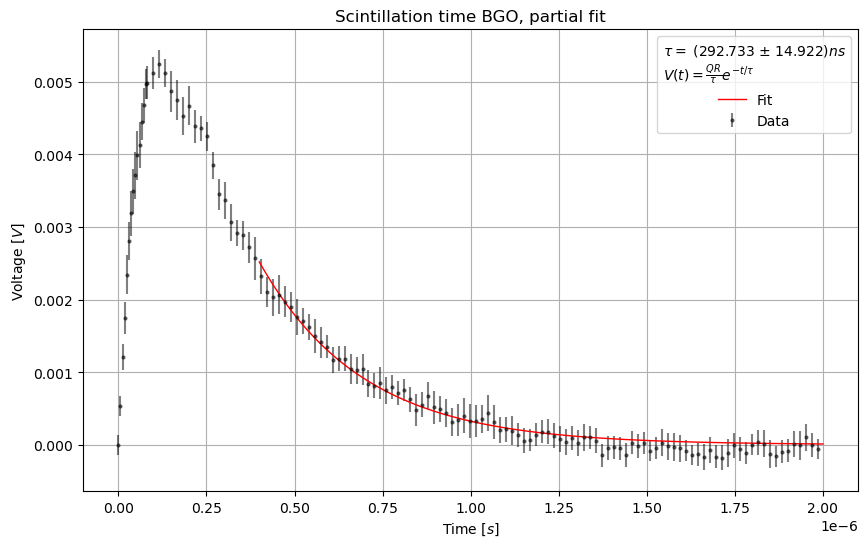

In [21]:
# fit BGO (senza pesi) parziale

ls = LeastSquares(time, volt, err_volt, BGO_part)

#maschera

t_low=0.4e-6
t_up=1.7e-6
ls.mask = (time > t_low) & (time< t_up)

tau_list, error_tau_list, QR_list, err_QR_list = repeat_fit(ls, t_low, t_up, 0.0000003, 1000, 0.1e-6, dis=False)

print(tau_list)
print(error_tau_list)

def weighted_mean(values, errors):
    mean = np.sum(values/(errors**2))/np.sum(1/(errors**2))
    error_mean = abs(np.max(values) - np.min(values))/2 # errore sistematico dovuto alla scelta del range di interpolazione.
    # non è errore statistico perchè non è dato dalla ripetizione della misura
    return mean, error_mean

tau_mean, tau_error_mean = weighted_mean(tau_list, error_tau_list)
QR_mean, QR_error_mean = weighted_mean(QR_list, err_QR_list)

print(f"tau: {tau_mean} +- {tau_error_mean}")
print(f"QR: {QR_mean} +- {QR_error_mean}")


#plot finale

smooth1=6
smooth2=17

times=np.array(data1['Time']+9.7e-08)[::smooth1]
timed=np.array(data2['Time']+9.7e-08)[::smooth2]
volts = np.array(data1['AverageVoltage']-0.0006618181818181819)[::smooth1]
voltd = np.array(data2['AverageVoltage']-0.0006618181818181819)[::smooth2]
time = np.concatenate((times,timed))    
volt = np.concatenate((volts,voltd))

#err sist sensibilità oscilloscopio
err_volt_s = np.array(data1['error'])[::smooth1]
err_volt_d = np.array(data2['error'])[::smooth2]
err_volt = np.sqrt((np.concatenate((err_volt_s,err_volt_d))/np.sqrt(6))**2+(0.00012)**2)

x_axis = np.linspace(0.4e-6, 2e-6, 10000)
y = BGO_part(x_axis,tau_list[2], QR_list[2])
plt.subplots(figsize=(10, 6))
plt.errorbar(time, volt, err_volt, fmt='o', label='Data', markersize=2, alpha=0.5, color='black')
plt.plot(x_axis, y, color='red', label='Fit', linewidth=1)
fit_info = []
fit_info.append(f'$\\tau = $ ({tau_list[2]*1000000000:.3f} $\\pm$ {error_tau_list[2]*1000000000:.3f})' + '$ns$')
fit_info.append('$V(t) = \\frac{QR}{\\tau}e^{-t/\\tau}$')
plt.legend(title="\n".join(fit_info), frameon=True)
plt.title('Scintillation time BGO, partial fit')
plt.grid(True)
plt.xlabel('Time $[s]$')
plt.ylabel('Voltage $[V]$')
plt.show()

